In [3]:
import numpy as np
from scipy.ndimage import gaussian_filter1d

In [4]:
sigma_values = np.linspace(0.1, 4.8, 48)

In [3]:
OASM_Pereira = {}
OASM_Fed = {}
OASM_Blank = {}

for s in sigma_values:
    
    s = round(s,3)
    
    d_labels_pereira = np.load('/data/LLMs/data_processed/pereira/dataset/data_labels_pereira.npy', allow_pickle=True)
    # gets the first index of each passage
    passage_shifts = np.argwhere(np.diff([int(x[-4]) for x in d_labels_pereira])!=0)[:,0]
    passage_shifts = np.concatenate(([0], passage_shifts+1,[627]))
    
    OASM_acts_pereira = np.eye(627)
    for ps in range(len(passage_shifts)-1):
        OASM_acts_pereira[passage_shifts[ps]:passage_shifts[ps+1], passage_shifts[ps]:passage_shifts[ps+1]] = gaussian_filter1d(
            OASM_acts_pereira[passage_shifts[ps]:passage_shifts[ps+1],passage_shifts[ps]:passage_shifts[ps+1]], sigma=s,axis=1)
    
    OASM_Pereira[str(s)] = OASM_acts_pereira

    # and for the Fedorenko dataset...
    passage_shifts_fed = np.arange(0,417,8)

    OASM_acts_fed = np.eye(416)
    for ps in range(len(passage_shifts_fed)-1):
        OASM_acts_fed[passage_shifts_fed[ps]:passage_shifts_fed[ps+1], passage_shifts_fed[ps]:passage_shifts_fed[ps+1]] = gaussian_filter1d(
            OASM_acts_fed[passage_shifts_fed[ps]:passage_shifts_fed[ps+1],passage_shifts_fed[ps]:passage_shifts_fed[ps+1]], sigma=s,axis=1)

    OASM_Fed[str(s)] = OASM_acts_fed


    # and for the Blank dataset...
    d_labels_blank_true = np.load('/data/LLMs/data_processed/blank/dataset/data_labels_blank.npy')
    passage_shifts_blank = np.concatenate((np.unique(d_labels_blank_true, return_index=True)[1], [1317]))

    OASM_acts_blank = np.eye(1317)
    for ps in range(len(passage_shifts_blank)-1):
        OASM_acts_blank[passage_shifts_blank[ps]:passage_shifts_blank[ps+1], passage_shifts_blank[ps]:passage_shifts_blank[ps+1]] = gaussian_filter1d(
            OASM_acts_blank[passage_shifts_blank[ps]:passage_shifts_blank[ps+1],passage_shifts_blank[ps]:passage_shifts_blank[ps+1]], sigma=s,axis=1)
        
        
    OASM_Blank[str(s)] = OASM_acts_blank
    

['243-astronaut-0-fh' '243-astronaut-0-fh' '243-astronaut-0-fh'
 '243-astronaut-0-fh' '243-astronaut-1-fh' '243-astronaut-1-fh'
 '243-astronaut-1-fh' '243-astronaut-2-fh' '243-astronaut-2-fh'
 '243-astronaut-2-fh' '243-beekeeping-0-fh' '243-beekeeping-0-fh'
 '243-beekeeping-0-fh' '243-beekeeping-0-fh' '243-beekeeping-1-fh'
 '243-beekeeping-1-fh' '243-beekeeping-1-fh' '243-beekeeping-1-fh'
 '243-beekeeping-2-fh' '243-beekeeping-2-fh']


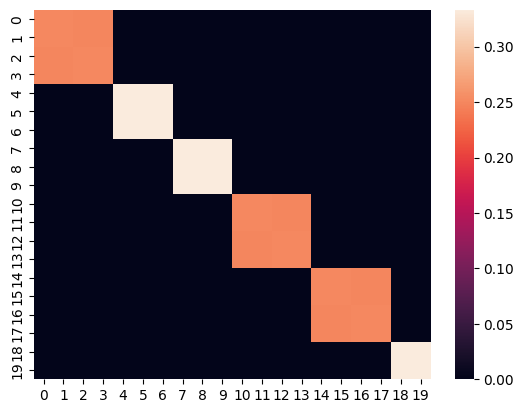

In [4]:
import seaborn as sns
sns.heatmap(OASM_acts_pereira[0:20, 0:20])
print(d_labels_pereira[0:20])

In [6]:
np.savez("/data/LLMs/data_processed/pereira/acts/X_OASM-all-sigma", **OASM_Pereira)